In [15]:
#import library

import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split as train
from sklearn.metrics import mean_absolute_error as mae
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot as plot
from sklearn.ensemble import RandomForestRegressor as rfr

In [3]:
#connect to google drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Lokasi File untuk dibaca
home_file_data = 'gdrive/My Drive/dataset/train.csv'

#Membaca Data ke variable home_data
home_data = pd.read_csv(home_file_data)

#Menunjukkan rangkuman statistik seperti rata-rata, median, dll pada kolom.
home_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
#mencari rata rata dari lotsize

avg_lot_size = round(home_data['LotArea'].mean()) #fungsi round untuk pembulatan
print("Rata - Rata Lot Size : ", avg_lot_size)

#berdasarkan hari ini, berapa umur dari rumah yang paling terbaru (tahun sekarang - tahun pembuatan)
sekarang = datetime.now()
tahun = sekarang.year

newest_home_year = round(home_data['YearBuilt'].max())
newest_home_age = tahun-newest_home_year 

print("Umur rumah paling terbaru pada saat ini yaitu : ",newest_home_age, "tahun")


Rata - Rata Lot Size :  10517
Umur rumah paling terbaru pada saat ini yaitu :  11 tahun


In [6]:
# melihat list column yang ada di dalam dataset 

print("List Column Ada Di Dataset")
print(home_data.columns)

#memilih column SalePrice

Y = home_data.SalePrice

#membuat list dari feature 
feature_names = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

#mendefinisikan feature_names untuk menjai variabel X yang memegang fitur prediktif
X = home_data[feature_names]

#Menunjukkan rangkuman statistik seperti rata-rata, median, dll pada kolom.
print(X.describe())

#cetak beberapa baris teratas
print(X.head())

List Column Ada Di Dataset
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
     

In [7]:
home_model = DecisionTreeRegressor(random_state=1)

#fit model
home_model.fit(X,Y)

#membuat prediksi

predictions = home_model.predict(X)
print(predictions)

#Berfungsi untuk melihat data sebanyak n pada kolom awal (jika tidak diisi, secara random n=6).

# You can write code in this cell
Y.head(6)


[208500. 181500. 223500. ... 266500. 142125. 147500.]


0    208500
1    181500
2    223500
3    140000
4    250000
5    143000
Name: SalePrice, dtype: int64

In [8]:
#train data

train_X, val_X, train_y, val_y = train(X,Y,random_state=1)

#tentukan modelnya

home_model = DecisionTreeRegressor(random_state=1)

#fit model dengan training data
home_model.fit(train_X,train_y)

#prediksi dengan semua obsvarsi validasi
val_predictions = home_model.predict(val_X)

#mencetak beberapa hasil prediksi teratas

print("Top Few Validation Predictions")
print(val_predictions[:5])

#mencetak beberapa hasil yang sebenarnya
print("Top Few Actual Prices From Validation")
print(val_y[:5])

Top Few Validation Predictions
[186500. 184000. 130000.  92000. 164500.]
Top Few Actual Prices From Validation
258     231500
267     179500
288     122000
649      84500
1233    142000
Name: SalePrice, dtype: int64


In [9]:
#Menghitung MAE pada validasi data
val_mae = mae(val_y, val_predictions)

print("MAE pada validasi data : ", val_mae)



MAE pada validasi data :  29652.931506849316


In [10]:
#membuat fungsi MAE

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    maes = mae(val_y, preds_val)
    return(maes)


Tulis loop yang mencoba nilai berikut untuk max_leaf_nodes dari sekumpulan nilai yang mungkin.

Panggil fungsi get_mae pada setiap nilai max_leaf_nodes. Simpan output dengan cara tertentu yang memungkinkan Anda memilih nilai max_leaf_nodes yang memberikan model paling akurat pada data Anda.

In [11]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]

#menggunakan fungsi loop untuk menemukan ukuran pohon ideal dari variabel diatas

list_mae = []
for leaf_nodes in candidate_max_leaf_nodes:
    result = get_mae(leaf_nodes, train_X, val_X, train_y, val_y)
    #print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(leaf_nodes, result))
    list_mae.append(result)

#simpan hasil dari max_leaf_nodes yang paling baik 
# Store the best value of max_leaf_nodes (itu akan menjadi 5, 25, 50, 100, 250 or 500)

print("\nthe best value of max_leaf_nodes :")
best_tree_size = candidate_max_leaf_nodes[list_mae.index(min(list_mae))] 
print(best_tree_size)



the best value of max_leaf_nodes :
100


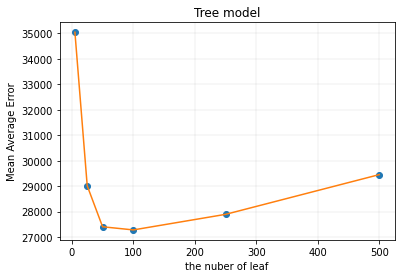

In [12]:
# Variables
a = candidate_max_leaf_nodes
b = list_mae

# Plot
plot(a, b ,'o')
plot(a, b, '-')
plt.xlabel('the nuber of leaf')
plt.ylabel('Mean Average Error')
plt.title('Tree model')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

In [13]:
#membuat ukuran yang optimal
final_model = DecisionTreeRegressor(max_leaf_nodes = best_tree_size, random_state=1)

#fit final model
final_model.fit(X, Y)
print("Hasil Fit Final Model : ", final_model)


Hasil Fit Final Model :  DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=100,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')


In [16]:
# Definisikan model. atur random_state to 1
rf_model = rfr(random_state = 1)

# fit your model
rf_model.fit(train_X, train_y)
rf_model_preds = rf_model.predict(val_X)

# Calculate the mean absolute error of your Random Forest model on the validation data
rf_val_mae = mae(val_y, rf_model_preds)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

Validation MAE for Random Forest Model: 21857.15912981083
